#  <font color=blue>Investigate a Dataset Project</font>


### <font color=blue>Hazem Sami Nuseir</font>

__Dataset overview:__<br>
_This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue._

● Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.<br>
● The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.<br>
 The source of the original dataset is at https://www.kaggle.com/tmdb/tmdb-movie-metadata/home.
 
in this project i will try to show all of data analysis steps:<br>
1- Ask Question<br>
2- Wrangle data<br>
3- Perform EDA (expalnatory data analysis)<br>
4- Draw conclusions(make predictions)<br>
<br>
__Step One:__<br>
__Questions:__<br>
_What properties are associated with higher revenues?_<br>
_Are there certain genres associated with higher revenues?_<br>
_Does a larger budget results a higher revenues?_<br>
_Do movies with higher revenues make more profits?_<br>
_Which genres are most popular from year to year? _<br>

In [1]:
#import necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

__Step two:__<br>
__Data Wrangling:__<br>
this step has three parts, first part is data gathering (dataset already provided by Udacity), second is data assesment and finally clean(modify, replace and remove), to do that i will load the csv spreadsheet provided by Udacity into a dataframe to assess it. i will be looking for missing data or any kind of data that contains problems in its structure. duplication will be removed and missing data (Nulls) will be replaced to ensure that the dataset is clean and ready for analysis.

In [2]:
# load dataset and display it is first 5 elements
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


As we can see there is lots of useful information here (some of these data are not useful for this project and wont be used), also some columns have multiple strings of information that should be separated out. i will add a new column to indicate profitabiity.


In [3]:
# get number of rows and columns for the dataset
df.shape

(10866, 21)

In [4]:
# show summary of dataset, and check for missing data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

As we can see there are missing data for many columns(fortunatlly there are not related to any of the questions we wana answer), i will remove them.

In [5]:
# show statistics for dataset
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


__Findings:__<br>
Budget ranges from approx. 0 - 425 million (average 17.6 million)<br>
Revenue ranges from approx. 0 - 2.8 billion (average 51.4 million)<br>
Popularity ranges from 0 - 33, (average  0.6, 32.986 seems to be an outlier)<br>
Votes range from 1.5 to 9.2 (average 6, assuming scale of 1-10)<br>


In [6]:
# remove irrelevant columns
df.drop(['imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies', 'release_date'], axis=1, inplace=True)
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


In [7]:
#check if there are dulpicates remove it
if (sum(df.duplicated())>0):
    df.drop_duplicates(inplace=True)

In [8]:
#check missing data
df.isnull().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

as we can see that cast,director, and genres have missing values and we can not replace missing values with average or other value, so i will remove these null values

In [9]:
#drop null values
df.dropna(inplace=True)

In [10]:
#check if null values removed successfully
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 14 columns):
id                10731 non-null int64
popularity        10731 non-null float64
budget            10731 non-null int64
revenue           10731 non-null int64
original_title    10731 non-null object
cast              10731 non-null object
director          10731 non-null object
runtime           10731 non-null int64
genres            10731 non-null object
vote_count        10731 non-null int64
vote_average      10731 non-null float64
release_year      10731 non-null int64
budget_adj        10731 non-null float64
revenue_adj       10731 non-null float64
dtypes: float64(4), int64(6), object(4)
memory usage: 1.2+ MB


all columns have proper naming convention(small letter with no spaces), and datatypes, so next step will be get rid of outliers if there is any(previously mentioned that popularity has possible outliers)

1
3
11


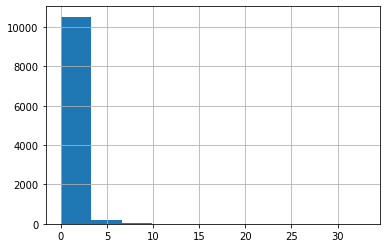

In [11]:
#check how many popularity rows have values more than 30,20,10,0.1 to see if there is outliers

print(np.sum(df['popularity']>30))
print(np.sum(df['popularity']>20))
print(np.sum(df['popularity']>10))
df['popularity'].hist()

as seen there is only one result for popularity above 30 ,three above 20, and an overall 11 values above 10, obviously these are outlier values, i will remove them

In [12]:
#remove rows where popularity larger than 10
df.drop(df[df.popularity >10].index, inplace=True)

find best correlation with revenues

In [13]:
df.corr()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,1.000000,-0.025810,-0.143608,-0.105183,-0.084696,-0.038990,-0.072843,0.510019,-0.190801,-0.144147
popularity,-0.025810,1.000000,0.584767,0.693446,0.149813,0.835235,0.238189,0.096176,0.558510,0.643748
budget,-0.143608,0.584767,1.000000,0.734687,0.190039,0.626506,0.082680,0.116096,0.968766,0.626302
revenue,-0.105183,0.693446,0.734687,1.000000,0.163248,0.787227,0.175072,0.055699,0.708173,0.923507
runtime,-0.084696,0.149813,0.190039,0.163248,1.000000,0.163101,0.176224,-0.120158,0.220821,0.177904
vote_count,-0.038990,0.835235,0.626506,0.787227,0.163101,1.000000,0.257874,0.107960,0.582515,0.703680
vote_average,-0.072843,0.238189,0.082680,0.175072,0.176224,0.257874,1.000000,-0.128829,0.096045,0.196630
release_year,0.510019,0.096176,0.116096,0.055699,-0.120158,0.107960,-0.128829,1.000000,0.016249,-0.068623
budget_adj,-0.190801,0.558510,0.968766,0.708173,0.220821,0.582515,0.096045,0.016249,1.000000,0.652417
revenue_adj,-0.144147,0.643748,0.626302,0.923507,0.177904,0.703680,0.196630,-0.068623,0.652417,1.000000


it is clear from results above that both budget and popularity have impact on revenues

now i will add a column for profit which equals revenue-budget, (budget and revenue = 0.734, popularity and revenue=0.693)

In [14]:
df['profit'] = df['revenue'] - df['budget']

In [15]:
#check if new column is created
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360
5,281957,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,3929,7.2,2015,1.241999e+08,4.903142e+08,397950503
6,87101,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,125,Science Fiction|Action|Thriller|Adventure,2598,5.8,2015,1.425999e+08,4.053551e+08,285603537
7,286217,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141,Drama|Adventure|Science Fiction,4572,7.6,2015,9.935996e+07,5.477497e+08,487380321
8,211672,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,2893,6.5,2015,6.807997e+07,1.064192e+09,1082730962


In [16]:
#check if there are movies that have loses and then make that loss equals to zero as our target to check profit not losses
df[df['profit']<0]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
48,265208,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,Simon West,92,Thriller|Crime|Drama,481,5.3,2015,2.759999e+07,0.000000e+00,-30000000
57,210860,2.575711,60000000,30418560,Mortdecai,Johnny Depp|Gwyneth Paltrow|Ewan McGregor|Paul...,David Koepp,106,Comedy|Adventure,696,5.3,2015,5.519998e+07,2.798506e+07,-29581440
59,201088,2.550747,70000000,17752940,Blackhat,Chris Hemsworth|Leehom Wang|Tang Wei|Viola Dav...,Michael Mann,133,Mystery|Crime|Action|Thriller|Drama,584,5.0,2015,6.439997e+07,1.633270e+07,-52247060
66,205775,2.345821,100000000,93820758,In the Heart of the Sea,Chris Hemsworth|Benjamin Walker|Cillian Murphy...,Ron Howard,122,Thriller|Drama|Adventure|Action|History,805,6.4,2015,9.199996e+07,8.631506e+07,-6179242
67,334074,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,James McTeigue,96,Crime|Thriller|Action,280,5.4,2015,1.839999e+07,0.000000e+00,-20000000
73,266647,2.234573,150000000,128388320,Pan,Levi Miller|Garrett Hedlund|Hugh Jackman|Roone...,Joe Wright,111,Adventure|Family|Fantasy,586,5.9,2015,1.379999e+08,1.181172e+08,-21611680
84,290764,2.026651,11000000,1863315,Tracers,Marie Avgeropoulos|Taylor Lautner|Adam Rayner|...,Daniel Benmayor,94,Action|Crime|Drama,326,5.9,2015,1.012000e+07,1.714249e+06,-9136685
87,287424,1.980039,4000000,187112,Maggie,Arnold Schwarzenegger|Abigail Breslin|Joely Ri...,Henry Hobson,95,Horror,384,5.1,2015,3.679998e+06,1.721430e+05,-3812888
89,181283,1.956320,50000000,3324330,Child 44,Tom Hardy|Gary Oldman|Noomi Rapace|Joel Kinnam...,Daniel Espinosa,137,Crime|Thriller,341,5.9,2015,4.599998e+07,3.058382e+06,-46675670
93,307663,1.872696,10000000,0,Vice,Ambyr Childers|Thomas Jane|Bryan Greenberg|Bru...,Brian A Miller,96,Thriller|Science Fiction|Action|Adventure,181,4.1,2015,9.199996e+06,0.000000e+00,-10000000


In [17]:
#make profit of losses equal to zero for simplicity
df.loc[df['profit'] < 0, 'profit'] = 0

now i will add a new column to calculate ratio between profit and revenue when profit is larger than zero, and if profit equal to zero then ratio will be equal to zero percent

In [18]:
#to avoid division by zero
df.loc[df['profit'] <= 0, 'ratioPercentage'] = 0

In [19]:
df.loc[df['profit']>0, 'ratioPercentage'] = (df['profit']/df['revenue'])*100

now i divide movie into three categories depending on revenues low_success, moderate_success, and high_success, assuming that low_success movie has revenue less that 5 million(assuming dollar as currency), moderate_success for movies with revenue between 5 million to 25 millions, finally high_success for more than 25 millions

In [20]:
success_value = [0, 5e+06, 25e+06, 2.827124e+09]
success_rate = ['low_success', 'moderate_success', 'high_success']
df['revenue_rating'] = pd.cut(df['revenue'], success_value, labels=success_rate)
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,ratioPercentage,revenue_rating
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360,87.385887,high_success
5,281957,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,3929,7.2,2015,1.241999e+08,4.903142e+08,397950503,74.669317,high_success
6,87101,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,125,Science Fiction|Action|Thriller|Adventure,2598,5.8,2015,1.425999e+08,4.053551e+08,285603537,64.820981,high_success
7,286217,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141,Drama|Adventure|Science Fiction,4572,7.6,2015,9.935996e+07,5.477497e+08,487380321,81.860334,high_success
8,211672,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,2893,6.5,2015,6.807997e+07,1.064192e+09,1082730962,93.602661,high_success


now i will provide statistics deping on success rate

In [21]:
df['revenue_rating'].value_counts()

high_success        2671
moderate_success    1167
low_success          994
Name: revenue_rating, dtype: int64

In [22]:
df.count()

id                 10720
popularity         10720
budget             10720
revenue            10720
original_title     10720
cast               10720
director           10720
runtime            10720
genres             10720
vote_count         10720
vote_average       10720
release_year       10720
budget_adj         10720
revenue_adj        10720
profit             10720
ratioPercentage    10720
revenue_rating      4832
dtype: int64

now as we can see from results above that there are null value for revenue_rating as a result of no revenues, i will consider these null values as low_success

In [23]:
df.revenue_rating.fillna('low_success', inplace=True)

In [24]:
df.count()

id                 10720
popularity         10720
budget             10720
revenue            10720
original_title     10720
cast               10720
director           10720
runtime            10720
genres             10720
vote_count         10720
vote_average       10720
release_year       10720
budget_adj         10720
revenue_adj        10720
profit             10720
ratioPercentage    10720
revenue_rating     10720
dtype: int64

the dataset contains movies released from 1960 till 2015, i will deal with each decade separetly, i.e 1960-1969, 1970-1979 ...

In [25]:
#note 1959 is part of list below just to make sure 1960 is included
decade_years = [1959, 1970, 1980, 1990, 2000, 2010, 2015]
decade_names = ['sixties', 'seventies', 'eighties', 'nineties', 'two_thousands', 'two_thousand_tens']
df['decades'] = pd.cut(df['release_year'], decade_years, labels=decade_names)

In [26]:
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,ratioPercentage,revenue_rating,decades
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360,87.385887,high_success,two_thousand_tens
5,281957,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,3929,7.2,2015,1.241999e+08,4.903142e+08,397950503,74.669317,high_success,two_thousand_tens
6,87101,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,125,Science Fiction|Action|Thriller|Adventure,2598,5.8,2015,1.425999e+08,4.053551e+08,285603537,64.820981,high_success,two_thousand_tens
7,286217,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141,Drama|Adventure|Science Fiction,4572,7.6,2015,9.935996e+07,5.477497e+08,487380321,81.860334,high_success,two_thousand_tens
8,211672,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,2893,6.5,2015,6.807997e+07,1.064192e+09,1082730962,93.602661,high_success,two_thousand_tens


now lets move genres column, as we can see that there is "|" seprator, next i will split between genres, also i will do the same to cast and director columns, by taking a copy of DF and manuplating it then join it again 

In [27]:
df_split_genre = df.copy()
split_genre = df_split_genre['genres'].str.split('|').apply(pd.Series, 1).stack().reset_index(level=1, drop=True)
split_genre.name = 'genre_split'
df_split_genre = df_split_genre.drop(['genres'], axis=1).join(split_genre)
df_split_genre.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,ratioPercentage,revenue_rating,decades,genre_split
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360,87.385887,high_success,two_thousand_tens,Action
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360,87.385887,high_success,two_thousand_tens,Crime
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360,87.385887,high_success,two_thousand_tens,Thriller
5,281957,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,3929,7.2,2015,1.241999e+08,4.903142e+08,397950503,74.669317,high_success,two_thousand_tens,Western
5,281957,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,3929,7.2,2015,1.241999e+08,4.903142e+08,397950503,74.669317,high_success,two_thousand_tens,Drama


In [28]:
#repeat same step above with cast and dirctor columns
df_split_cast = df.copy()
split_cast = df_split_cast['cast'].str.split('|').apply(pd.Series, 1).stack().reset_index(level=1, drop=True)
split_cast.name = 'cast_split'
df_split_cast = df_split_cast.drop(['cast'], axis=1).join(split_cast)
df_split_cast.head()

,id,popularity,budget,revenue,original_title,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,ratioPercentage,revenue_rating,decades,cast_split
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360,87.385887,high_success,two_thousand_tens,Vin Diesel
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360,87.385887,high_success,two_thousand_tens,Paul Walker
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360,87.385887,high_success,two_thousand_tens,Jason Statham
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360,87.385887,high_success,two_thousand_tens,Michelle Rodriguez
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360,87.385887,high_success,two_thousand_tens,Dwayne Johnson


In [29]:
df_split_director = df.copy()
split_director = df_split_director['director'].str.split('|').apply(pd.Series, 1).stack().reset_index(level=1, drop=True)
split_director.name = 'director_split'
df_split_director = df_split_director.drop(['director'], axis=1).join(split_director)
df_split_director.head()

,id,popularity,budget,revenue,original_title,cast,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,ratioPercentage,revenue_rating,decades,director_split
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360,87.385887,high_success,two_thousand_tens,James Wan
5,281957,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,156,Western|Drama|Adventure|Thriller,3929,7.2,2015,1.241999e+08,4.903142e+08,397950503,74.669317,high_success,two_thousand_tens,Alejandro GonzÃ¡lez IÃ±Ã¡rritu
6,87101,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,125,Science Fiction|Action|Thriller|Adventure,2598,5.8,2015,1.425999e+08,4.053551e+08,285603537,64.820981,high_success,two_thousand_tens,Alan Taylor
7,286217,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,141,Drama|Adventure|Science Fiction,4572,7.6,2015,9.935996e+07,5.477497e+08,487380321,81.860334,high_success,two_thousand_tens,Ridley Scott
8,211672,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,91,Family|Animation|Adventure|Comedy,2893,6.5,2015,6.807997e+07,1.064192e+09,1082730962,93.602661,high_success,two_thousand_tens,Kyle Balda


now i try to find relation with years(genre,...)

Text(0, 0.5, 'Movie count')

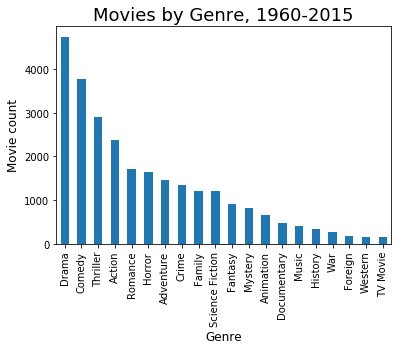

In [30]:
df_split_genre['genre_split'].value_counts().plot(kind='bar')
plt.title('Movies by Genre, 1960-2015', size=18)
plt.xlabel('Genre', size=12)
plt.ylabel('Movie count', size=12)

from chart above we find that drama has the highest count then comdey... and so on, next i will show what was the trend in each decade and show most 4 genres in each decade

In [31]:
genres_decades = df_split_genre.groupby(['decades'])['genre_split'].value_counts()
genres_decades.groupby(level=0).nlargest(4).reset_index(level=0, drop=True)

decades            genre_split
sixties            Drama           186
                   Comedy          124
                   Action           89
                   Romance          73
seventies          Drama           251
                   Thriller        168
                   Action          136
                   Comedy          134
eighties           Comedy          451
                   Drama           449
                   Action          283
                   Thriller        281
nineties           Drama           902
                   Comedy          785
                   Thriller        512
                   Action          463
two_thousands      Drama          1717
                   Comedy         1421
                   Thriller       1042
                   Action          836
two_thousand_tens  Drama          1240
                   Comedy          860
                   Thriller        825
                   Action          562
Name: genre_split, dtype: int64

note from result aboe that drama has the highest count for all decades except eighties comedy took highest count with small dfference, now lets find the highest revenue genres 

In [32]:
high_score_genre=df_split_genre.query('revenue_rating=="high_success"')
#df_split_genre.sort_values(by=['revenue_rating'], ascending=False)
high_score_genre['genre_split'].value_counts()


Drama              1095
Comedy             1030
Action              819
Thriller            805
Adventure           616
Romance             454
Crime               448
Family              380
Science Fiction     354
Fantasy             324
Horror              265
Mystery             220
Animation           176
History              92
Music                91
War                  81
Western              31
Documentary          11
Foreign               2
TV Movie              1
Name: genre_split, dtype: int64

now i will calculate ratio between total high success of certain genre and total count of ceratin genre to decide which genre has the best success rate

In [33]:
genre_success_rate=high_score_genre['genre_split'].value_counts()/df_split_genre['genre_split'].value_counts()

In [34]:
genre_success_rate

Action             0.345715
Adventure          0.423368
Animation          0.265060
Comedy             0.272848
Crime              0.331116
Documentary        0.023404
Drama              0.230769
Family             0.313015
Fantasy            0.357616
Foreign            0.010870
History            0.278788
Horror             0.161980
Music              0.228070
Mystery            0.272277
Romance            0.265808
Science Fiction    0.292079
TV Movie           0.006173
Thriller           0.277874
War                0.302239
Western            0.189024
Name: genre_split, dtype: float64

from results above we find that Adventure movies have the highest success rate while TV Movie have the lowest

In [35]:
 df_split_cast['cast_split'].value_counts()

Robert De Niro            72
Samuel L. Jackson         70
Bruce Willis              62
Nicolas Cage              61
Michael Caine             52
Robin Williams            51
John Cusack               50
Morgan Freeman            49
John Goodman              49
Liam Neeson               48
Susan Sarandon            48
Alec Baldwin              47
Julianne Moore            47
Gene Hackman              46
Tom Hanks                 46
Johnny Depp               46
Christopher Walken        46
Dennis Quaid              45
Sylvester Stallone        44
Clint Eastwood            44
Ed Harris                 44
Meryl Streep              44
Willem Dafoe              44
Donald Sutherland         43
Antonio Banderas          43
Ewan McGregor             43
Danny Glover              42
Nicole Kidman             42
Anthony Hopkins           42
Keanu Reeves              42
                          ..
Mitch Hewer                1
Carrie Crawford            1
Robert Kotecki             1
Jadie-Rose Hob

so from above Robert de Niro starred in most movies

In [36]:
df_split_director['director_split'].value_counts()

Woody Allen              46
Clint Eastwood           34
Steven Spielberg         30
Martin Scorsese          30
Steven Soderbergh        23
Ridley Scott             23
Ron Howard               22
Joel Schumacher          21
Brian De Palma           20
Robert Rodriguez         19
Francis Ford Coppola     19
David Cronenberg         19
Barry Levinson           19
Tim Burton               19
John Carpenter           19
Wes Craven               19
Mike Nichols             18
Walter Hill              18
Rob Reiner               18
John Landis              18
Roman Polanski           17
Oliver Stone             17
Peter Hyams              17
Robert Zemeckis          17
Sidney Lumet             17
Tyler Perry              17
Renny Harlin             17
Spike Lee                17
Stephen Frears           17
Joel Coen                17
                         ..
Fabrizio Conte            1
Thomas Riedelsheimer      1
Robert Morgan             1
Satoshi Nishimura         1
Mike McCoy          

an Woody Allen directed the most

## Conclusions

_Drama, Comedy, Thriller, and Action are the most popular genres in general. TV Movies, Westerns, and Foreigns
are the least popular._<br>
_Since 1960, Drama has been the most popular genre per decade except for the 80's Comedy was more poular._<br>
Although Drama, Comedy, and Thriller are the most popular genre overall, the Top revenue producing movies are Adventure._<br>
_Movies with higher revenues are consistently more profitable._<br>
_Movies with higher revenues make more profits._<br>
_Woody Allen directed most among directors_<br>
_Robert De Niro starred the most among cast_<br>